In [5]:
# Load libraries and generate datasets
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 18})

# This part of the code generates the 2 datasets
# Feel free to read through it to understand how the data is generated.
# Do not change it.
np.random.seed(1044216)

def generate_dataset(sources, n_data_points, noise_var, data_mean=[0.0, 0.0]):
  n_sources = len(sources)
  base_pts = np.random.randn(n_data_points,1)
  noise_input = [noise_var[0] * np.random.randn(n_data_points,2), \
                 noise_var[1] * np.random.randn(n_data_points,2)]
  data_pts = [data_mean[sx] + base_pts * sources[sx] + noise_input[sx] \
              for sx in range(n_sources)]
  
  merged_data = np.concatenate(data_pts)
  np.random.shuffle(merged_data)
  return merged_data

# Dataset 1
sources_1   = [np.array([[1.5, 1.5]]), np.array([[1.0, -1.0]])]
noise_var_1 = [0.5, 0.5]
data_mean_1 = [2*np.random.randn(), 2*np.random.randn()]
dataset_1   = generate_dataset(sources_1, 1000, noise_var_1, data_mean_1)

# Dataset 2
sources_2   = [np.array([[1.5, 0.9]]), np.array([[0.9, 1.5]])]
noise_var_2 = [0.2, 0.2]
data_mean_2 = [1.5*np.random.randn(), 3.0*np.random.randn()]
dataset_2   = generate_dataset(sources_2, 1000, noise_var_2, data_mean_2)

# Dataset 3
sources_3   = [np.array([1.0, -1.0]), np.array([1.0, -1.0])]
noise_var_3 = [0.1, 0.1]
data_mean_3 = [0.3, -0.3]
dataset_3   = generate_dataset(sources_3, 1000, noise_var_3, data_mean_3)

Text(0, 0.5, '$\\mathregular{x_2}$')

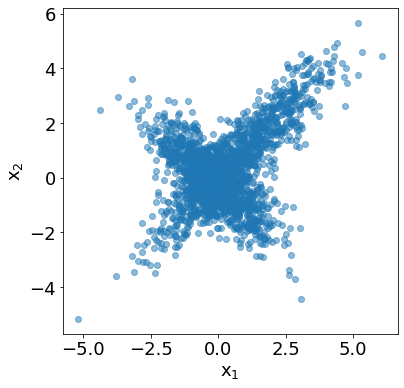

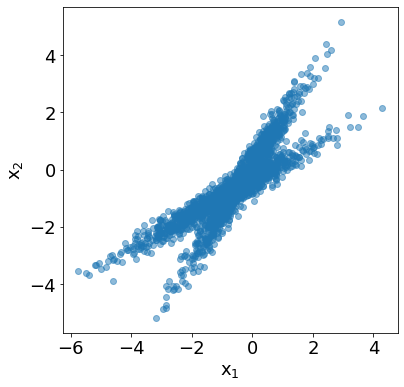

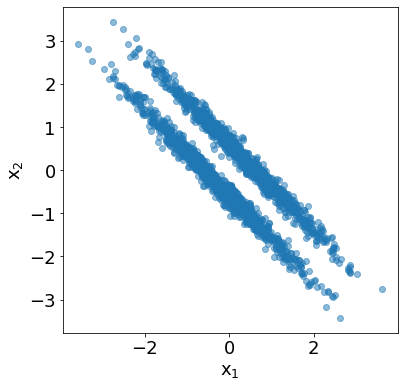

In [6]:
# Plot the data sets
plt.figure(figsize=(6,6))
plt.scatter(dataset_1[:,0], dataset_1[:,1], alpha=0.5, color='#1f77b4')
plt.xlabel('$\mathregular{x_1}$')
plt.ylabel('$\mathregular{x_2}$')
plt.figure(figsize=(6,6))
plt.scatter(dataset_2[:,0], dataset_2[:,1], alpha=0.5, color='#1f77b4')
plt.xlabel('$\mathregular{x_1}$')
plt.ylabel('$\mathregular{x_2}$')
plt.figure(figsize=(6,6))
plt.scatter(dataset_3[:,0], dataset_3[:,1], alpha=0.5, color='#1f77b4')
plt.xlabel('$\mathregular{x_1}$')
plt.ylabel('$\mathregular{x_2}$')
# DEBUG HELP - Print the dataset size
# print(dataset_1.shape)

In [7]:
# First find the mean of the dataset and the substract it to center the data
def demean_dataset(dataset):
  #================ STUDENT CODE HERE =======================#
  # Change these lines to subtract the mean from the data
  original_data_mean = np.mean(dataset, axis=0)
  demeaned_data = dataset - original_data_mean
  new_dataset_mean = np.mean(demeaned_data, axis=0)
  #====================== END CODE ==========================#
  print("Original dataset has mean...")
  print(original_data_mean)
  print("After mean subtraction, the mean is...")
  print(new_dataset_mean)
  return demeaned_data

def get_singular_value_decomp(A):
  #================ STUDENT CODE HERE =======================#
  # Change these lines to find the singular value decomposition 
  # using inbuilt library functions
  u, s, vh = np.linalg.svd(A, compute_uv=True)
  sigma = s
  u_vec = u
  v_vec = vh
  #====================== END CODE ==========================#

  return u_vec, sigma, v_vec

def get_principal_components(u_vec, sigma, v_vec):
  #================ STUDENT CODE HERE =======================#
  n_data_points = u_vec.shape[0]

  # Use the singular value decomposition to find the two 
  # principal components
  w1 = sigma[0]/np.sqrt(n_data_points)
  PC_1 = v_vec[0,:]

  w2 = sigma[1]/np.sqrt(n_data_points)
  PC_2 = v_vec[1,:]
  #====================== END CODE ==========================#  

  return w1, w2, PC_1, PC_2

Original dataset has mean...
[0.2886018  0.33327812]
After mean subtraction, the mean is...
[-5.88418203e-16  4.32986980e-17]


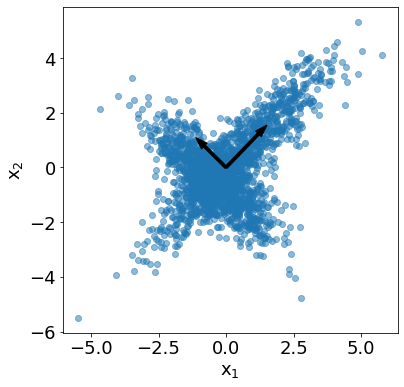

Weight 1.72, First Principal Component: 
[0.69848378 0.71562589]
Weight 1.12, Second Principal Component: 
[-0.71562589  0.69848378]

Original dataset has mean...
[-0.65861368 -0.64826824]
After mean subtraction, the mean is...
[-5.4922733e-16 -3.8768988e-16]


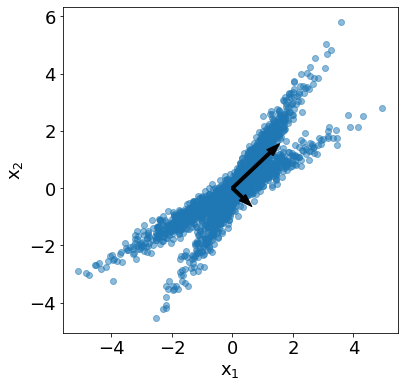

Weight 1.75, First Principal Component: 
[0.7078537  0.70635907]
Weight 0.46, Second Principal Component: 
[ 0.70635907 -0.7078537 ]

Original dataset has mean...
[ 0.01570045 -0.00986268]
After mean subtraction, the mean is...
[-3.18078897e-17  1.74582571e-17]


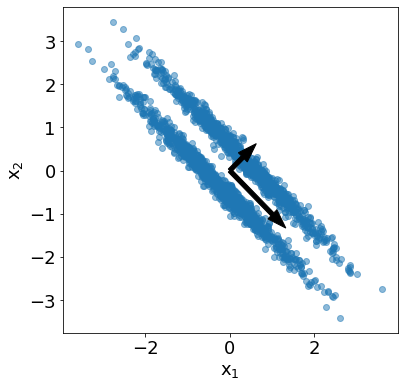

Weight 1.43, First Principal Component: 
[ 0.70535146 -0.70885775]
Weight 0.44, Second Principal Component: 
[0.70885775 0.70535146]



(1.4312055461231687,
 0.43583890697095956,
 array([ 0.70535146, -0.70885775]),
 array([0.70885775, 0.70535146]))

In [8]:
# Use the methods defined in the previous code block to get the principal 
# components for the two datasets

def your_PCA_algorithm(dataset):
  demeaned_data = demean_dataset(dataset)
  u_vec, sigma, v_vec = get_singular_value_decomp(demeaned_data)
  w1, w2, PC_1, PC_2 = get_principal_components(u_vec, sigma, v_vec)

  plt.figure(figsize=(6,6))
  plt.scatter(demeaned_data[:,0], demeaned_data[:,1], alpha=0.5, color='#1f77b4')
  # Principal components rescaled to show them on the same scale as the data
  plt.arrow(0, 0, w1*PC_1[0], w1*PC_1[1], width=0.1, facecolor='k')
  plt.arrow(0, 0, w2*PC_2[0], w2*PC_2[1], width=0.1, facecolor='k')
  plt.xlabel('$\mathregular{x_1}$')
  plt.ylabel('$\mathregular{x_2}$')
  plt.show()

  print('Weight %.2f, First Principal Component: '%w1)
  print(PC_1)
  print('Weight %.2f, Second Principal Component: '%w2)
  print(PC_2)
  print()

  return w1, w2, PC_1, PC_2

your_PCA_algorithm(dataset_1)
your_PCA_algorithm(dataset_2)
your_PCA_algorithm(dataset_3)